In [1]:
import os 
import sys 

project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 
if project_root not in sys.path: 
    sys.path.insert(0, project_root)

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import torch  
import minari 
import numpy as np

from models import cmhn


In [2]:
cmhn = cmhn.cmhn(update_steps=3, device="cpu")

In [3]:
def generate_points(n_points) -> list[tuple]: 
    """
    Generates initial points. 

    Args: 
        n_points: The number of points to generate.

    Returns: 
        A list of tuples containing (x,y) coords of the points. 
    """

    points = [] 

    for _ in range(n_points): 
        points.append((np.random.random_sample() * 50, np.random.random_sample() * 50))
    
    return points

In [4]:
def generate_neighbours(point, n_neighbours, epsilon) -> list[tuple]:
    """
    Generates neighbouring points nearby "point" within a given epsilon margin. 
    
    Args: 
        point: The point that the generated neighbours are nearby. 
        n_neighbours: The number of neighbouring points to generate. 
        epsilon: How close or far away these neighbours could be generated.

    Returns: 
        A list of tuples containing (x,y) coords of the neighbours.  
    """ 
    neighbours = []

    point_x = point[0]
    point_y = point[1]
    for _ in range(n_neighbours): 
        neighbours.append((point_x + np.random.uniform(-1, 1) * epsilon, point_y + np.random.uniform(-1, 1) * epsilon))
    
    return neighbours


In [5]:
points = generate_points(n_points= 3)

neighbours = []
for i in range(len(points)):
    neighbours.append(generate_neighbours(points[i], n_neighbours=7, epsilon=1))

print(points)
print(neighbours)



[(3.9786967892106286, 35.76116717028569), (25.635032528424684, 31.329672253535072), (19.517405310520992, 25.512217728774957)]
[[(3.5977206914997595, 36.08197216178229), (3.664391524606716, 34.997950738011845), (4.646354169261993, 34.989690997940194), (4.293580465334483, 35.03823818693321), (3.5697607202076616, 35.93122622063012), (4.271709106965378, 36.52490104296728), (4.516508739992524, 36.42049985969033)], [(26.32202319437719, 30.42775978001572), (25.468860275474498, 32.05303405628053), (26.280898089285387, 31.029770711380948), (25.982772652888304, 32.06620050466078), (25.92709576933427, 31.922543724932208), (25.920051429161898, 30.4124015729769), (26.151532640243886, 31.84447936801723)], [(20.149662616986777, 25.011830736818126), (18.530229341166827, 24.89381849689047), (18.559917969780134, 26.324403882743415), (18.940491367864865, 25.388625917254096), (20.154109777122134, 24.56649287152589), (18.62862381030073, 25.85826803010199), (19.584512911738553, 25.66409490181915)]]


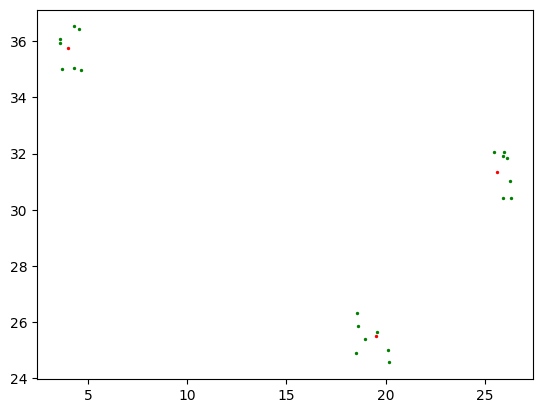

In [6]:

plt.plot(figsize=(10,10))
for i in range(len(points)): 
    plt.scatter(x = points[i][0], y=points[i][1], s=2, c="red")

for i in range(len(neighbours)): 
    for j in range(len(neighbours[0])):
        plt.scatter(x = neighbours[i][j][0], y = neighbours[i][j][1], s=2, c="green")
plt.show()

In [7]:
X = torch.as_tensor(points, dtype=torch.float32)
xi = torch.as_tensor([pt for group in neighbours for pt in group], dtype=torch.float32)
beta = torch.as_tensor(50, dtype=torch.float32)

In [8]:
pts = []
for i in range(xi.size(0)): 
    pts.append(cmhn.run(X, xi[i], beta=beta))

tuple_pts = [tuple(t.flatten().tolist()) for t in pts]

print(tuple_pts)


[(0.11113306134939194, 0.9936405420303345), (0.11113306134939194, 0.9936404228210449), (0.11113319545984268, 0.9936404824256897), (0.11113312840461731, 0.9936403632164001), (0.11113305389881134, 0.9936405420303345), (0.11113310605287552, 0.9936403632164001), (0.1111331358551979, 0.9936404228210449), (0.6203052401542664, 0.784140944480896), (0.6203051805496216, 0.7841410636901855), (0.6203052401542664, 0.784140944480896), (0.6203051805496216, 0.7841410636901855), (0.6203051805496216, 0.7841410636901855), (0.6203052401542664, 0.784140944480896), (0.6203051805496216, 0.7841410040855408), (0.6203051805496216, 0.7841410636901855), (0.620305061340332, 0.7841412425041199), (0.6203048229217529, 0.7841412425041199), (0.620305061340332, 0.7841412425041199), (0.6203052401542664, 0.7841410040855408), (0.6203049421310425, 0.7841411828994751), (0.620305061340332, 0.7841411828994751)]


In [9]:
unique_pts = []
seen = set()

for t in tuple_pts:
    if t not in seen:
        seen.add(t)
        unique_pts.append(t)
print(len(unique_pts))
unique_pts



15


[(0.11113306134939194, 0.9936405420303345),
 (0.11113306134939194, 0.9936404228210449),
 (0.11113319545984268, 0.9936404824256897),
 (0.11113312840461731, 0.9936403632164001),
 (0.11113305389881134, 0.9936405420303345),
 (0.11113310605287552, 0.9936403632164001),
 (0.1111331358551979, 0.9936404228210449),
 (0.6203052401542664, 0.784140944480896),
 (0.6203051805496216, 0.7841410636901855),
 (0.6203051805496216, 0.7841410040855408),
 (0.620305061340332, 0.7841412425041199),
 (0.6203048229217529, 0.7841412425041199),
 (0.6203052401542664, 0.7841410040855408),
 (0.6203049421310425, 0.7841411828994751),
 (0.620305061340332, 0.7841411828994751)]

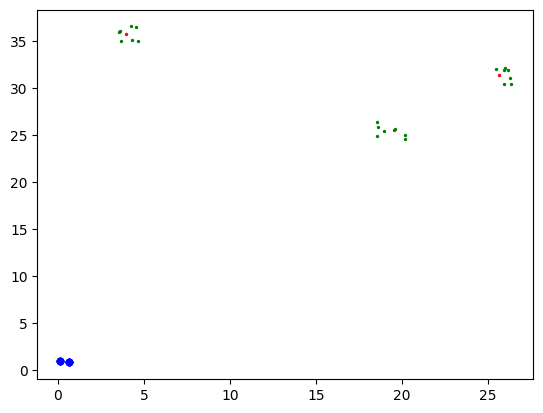

In [10]:

plt.plot(figsize=(10,10))

for i in range(len(unique_pts)):
    plt.scatter(x = unique_pts[i][0], y=unique_pts[i][1], s=20, c="blue")

for i in range(len(points)): 
    plt.scatter(x = points[i][0], y=points[i][1], s=2, c="red")

for i in range(len(neighbours)): 
    for j in range(len(neighbours[0])):
        plt.scatter(x = neighbours[i][j][0], y = neighbours[i][j][1], s=2, c="green")
plt.show()